In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import re

[ 107.64     54.894    28.822    15.229     7.7342    5.9699    5.5722
    5.3503]
[ 0.14282857  0.43658218  0.8023316   0.15062868  0.00116619  0.15088966
  0.10418714  0.06356894]


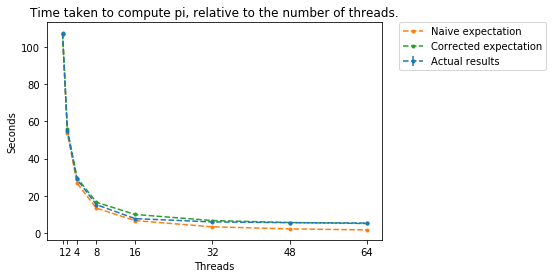

In [2]:
fnames = glob("slurm-*.out")
pifinder = re.compile(".*Using \d+ thread.* (\d\.\d*) computed in (\d+\.*\d*).+")
times = np.zeros((8,10))
numfile = 0
for i in fnames:
    with open(i) as f:
        counter = 0
        for l in f.readlines()[1:9]:
#             print(l)
#             print(pifinder.sub("\\2", l))
            times[counter][numfile] = float(pifinder.sub("\\2", l))
            counter += 1
    numfile += 1
threads = np.array((1,2,4,8,16,32,48,64))

print(np.mean(times,axis=1))
print(np.std(times,axis=1))
actual_improv = np.array((1,1.9217,3.6097,6.4716,10.7345,15.9603,18.9770,20.8853))

plt.errorbar(threads,np.mean(times, axis=1), yerr=np.std(times, axis=1), fmt='.--',label="Actual results");
plt.plot(threads, [107]*8/threads, '.--',label="Naive expectation");
plt.plot(threads,107/actual_improv, '.--', label="Corrected expectation")
plt.title("Time taken to compute pi, relative to the number of threads.");
plt.xticks(threads);
plt.xlabel("Threads");
plt.ylabel("Seconds");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("pi_graph.svg",bbox_inches='tight',pad_inches=0.2);
plt.show();



[ 28.17169624  28.06594887  28.03685595  28.06930959  28.01144922
  27.75740953  27.49880775  27.78362568]
[ 0.00649307  0.01738419  0.02425057  0.02217296  0.04263203  0.10439559
  0.08191221  0.29205102]


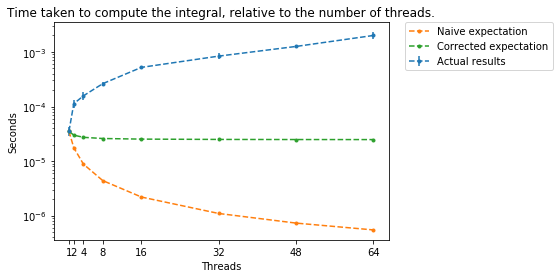

In [5]:
fnames = glob("slurm-*.out")
pifinder = re.compile(".*Using \d+ thread.* = (\d\d\.\d*) computed in (\d+\.*\d*.*)s.*")
times_int = np.zeros((8,10))
integrals = np.zeros((8,10))
numfile = 0
for i in fnames:
    with open(i) as f:
        num_threads = 0
        for l in f.readlines()[10:18]:
#             print(l)
            integrals[num_threads][numfile] = float(pifinder.sub("\\1", l))
            times_int[num_threads][numfile] = float(pifinder.sub("\\2", l))
            num_threads += 1
    numfile += 1
threads = np.array((1,2,4,8,16,32,48,64))

print(np.mean(integrals, axis=1))
times_int_mean = np.mean(times_int,axis=1)
times_int_std = np.std(times_int,axis=1)
actual_improv = np.array((1,1.1765,1.2903,1.3559,1.3913,1.4097,1.4159,1.4191))
print(times_int_std*1000)

plt.errorbar(threads,times_int_mean, yerr=times_int_std, fmt='.--',label="Actual results");
plt.plot(threads, [times_int_mean[0]]*num_threads/threads, '.--',label="Naive expectation");
plt.plot(threads,times_int_mean[0]/actual_improv, '.--', label="Corrected expectation")
plt.title("Time taken to compute the integral, relative to the number of threads.");
plt.xticks(threads);
plt.xlabel("Threads");
plt.ylabel("Seconds");
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("int_graph.svg",bbox_inches='tight',pad_inches=0.2);
plt.show();